## Library

In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import OrdinalEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import recall_score, classification_report, \
                            confusion_matrix, accuracy_score, \
                            f1_score, ConfusionMatrixDisplay, \
                            precision_score, recall_score
import warnings
warnings.filterwarnings('ignore')


## Data Preparation

In [5]:
df = pd.read_csv('train.csv')
df.head()

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
0,OH,107,area_code_415,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,no
1,NJ,137,area_code_415,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,no
2,OH,84,area_code_408,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,no
3,OK,75,area_code_415,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,no
4,MA,121,area_code_510,no,yes,24,218.2,88,37.09,348.5,108,29.62,212.6,118,9.57,7.5,7,2.03,3,no


In [6]:
df.describe()

,account_length,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls
count,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000
mean,100.236235,7.631765,180.259600,99.907294,30.644682,200.173906,100.176471,17.015012,200.527882,99.839529,9.023892,10.256071,4.426353,2.769654,1.559059
std,39.698401,13.439882,54.012373,19.850817,9.182096,50.249518,19.908591,4.271212,50.353548,20.093220,2.265922,2.760102,2.463069,0.745204,1.311434
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,73.000000,0.000000,143.325000,87.000000,24.365000,165.925000,87.000000,14.102500,167.225000,86.000000,7.522500,8.500000,3.000000,2.300000,1.000000
50%,100.000000,0.000000,180.450000,100.000000,30.680000,200.700000,100.000000,17.060000,200.450000,100.000000,9.020000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,16.000000,216.200000,113.000000,36.750000,233.775000,114.000000,19.867500,234.700000,113.000000,10.560000,12.000000,6.000000,3.240000,2.000000
max,243.000000,52.000000,351.500000,165.000000,59.760000,359.300000,170.000000,30.540000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4250 entries, 0 to 4249
Data columns (total 20 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   state                          4250 non-null   object 
 1   account_length                 4250 non-null   int64  
 2   area_code                      4250 non-null   object 
 3   international_plan             4250 non-null   object 
 4   voice_mail_plan                4250 non-null   object 
 5   number_vmail_messages          4250 non-null   int64  
 6   total_day_minutes              4250 non-null   float64
 7   total_day_calls                4250 non-null   int64  
 8   total_day_charge               4250 non-null   float64
 9   total_eve_minutes              4250 non-null   float64
 10  total_eve_calls                4250 non-null   int64  
 11  total_eve_charge               4250 non-null   float64
 12  total_night_minutes            4250 non-null   f

In [8]:
a = round(df['churn'].value_counts()/len(df['churn']),2)
churn_ratio=  pd.DataFrame(a).T
churn_ratio = churn_ratio.rename(columns={'no':'Not Churn' , 'yes':'Churn'})
churn_ratio

churn,Not Churn,Churn
count,0.86,0.14


In [9]:
# Missings And duplicates values
print(df.isna().sum().sort_values(ascending = False))
print('duplicate values in df' ,df.duplicated().sum() )
print('duplicates dropped')

state                            0
account_length                   0
number_customer_service_calls    0
total_intl_charge                0
total_intl_calls                 0
total_intl_minutes               0
total_night_charge               0
total_night_calls                0
total_night_minutes              0
total_eve_charge                 0
total_eve_calls                  0
total_eve_minutes                0
total_day_charge                 0
total_day_calls                  0
total_day_minutes                0
number_vmail_messages            0
voice_mail_plan                  0
international_plan               0
area_code                        0
churn                            0
dtype: int64
duplicate values in df 0
duplicates dropped


## EDA

In [10]:
categ_columns = []
for col in df.columns:
	if df[col].nunique()<10:
		categ_columns.append(col)

print('categ numericals columns are {}'.format(categ_columns))

Num_cols = ['number_vmail_messages' ,'total_day_minutes' ,'total_day_calls',
       'total_day_charge', 'total_eve_minutes', 'total_eve_calls',
       'total_eve_charge', 'total_night_minutes', 'total_night_calls',
       'total_night_charge', 'total_intl_minutes', 'total_intl_calls',
       'total_intl_charge' ]
print('nums numericals columns are {}'.format(Num_cols))

categ numericals columns are ['area_code', 'international_plan', 'voice_mail_plan', 'churn']
nums numericals columns are ['number_vmail_messages', 'total_day_minutes', 'total_day_calls', 'total_day_charge', 'total_eve_minutes', 'total_eve_calls', 'total_eve_charge', 'total_night_minutes', 'total_night_calls', 'total_night_charge', 'total_intl_minutes', 'total_intl_calls', 'total_intl_charge']


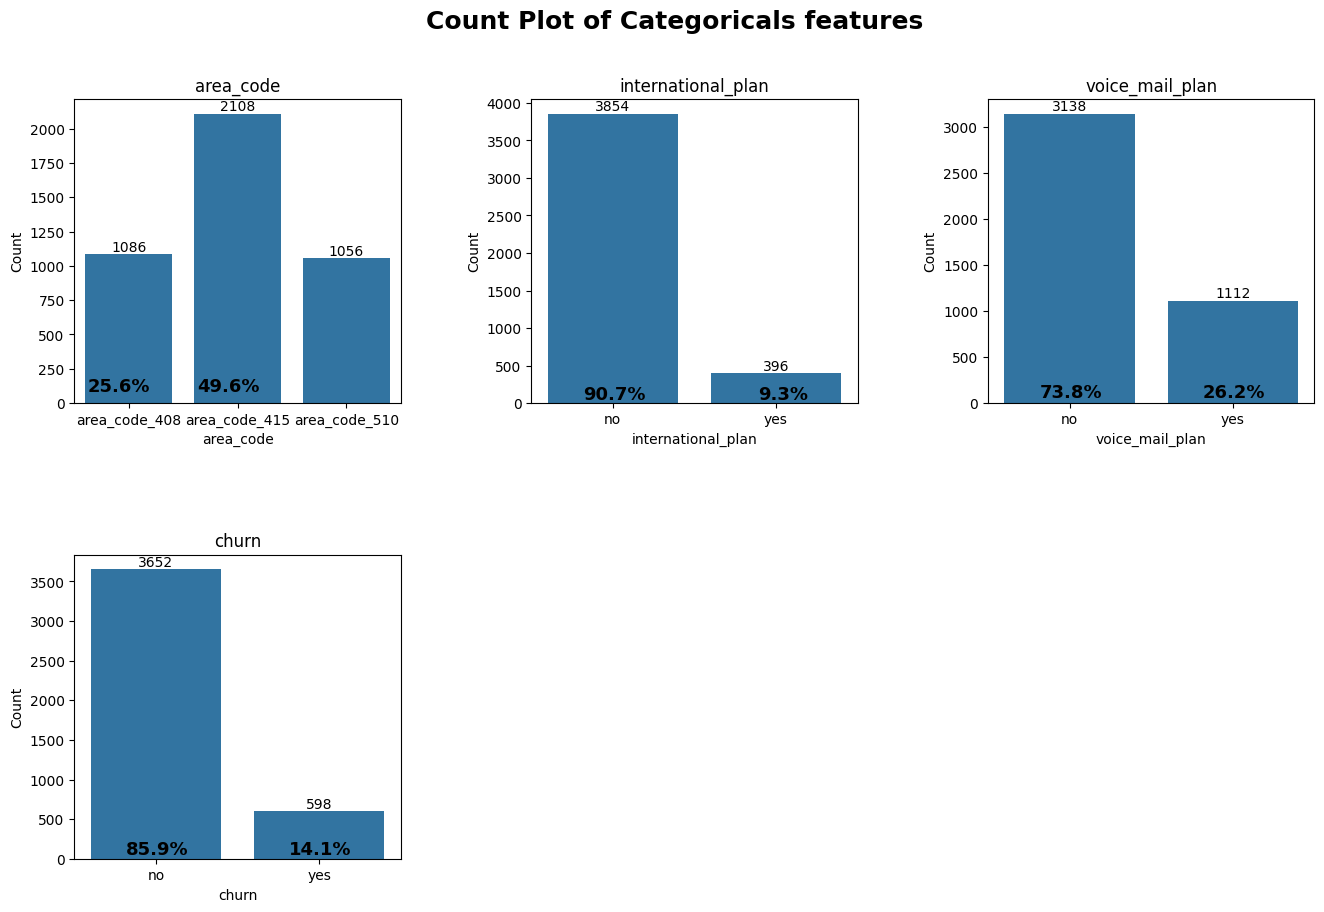

In [11]:
fig = plt.figure(figsize=[16,15])
fig.suptitle('Count Plot of Categoricals features', fontsize=18, fontweight='bold')
fig.subplots_adjust(top=0.92);
fig.subplots_adjust(hspace=0.5, wspace=0.4);
for i , columns in enumerate(categ_columns):
    input = np.unique(df[columns] , return_counts = True)
    col= 'input'
    ax1 = fig.add_subplot(3, 3, i+1);
    ax1 = sns.barplot(x=list(eval(f'{col}[0]')), y=list(eval(f'{col}[1]')))
    #The below two lines of codes are used for percentage values.
    ax1.text(0.2, 120, '{}%' .format(str(round(eval(f'{col}[1][0]')/sum(eval(f'{col}[1]'))*100,1))), ha='right', va='center', size=13, fontdict={'weight': 'bold'})
    ax1.text(1.2, 120, '{}%' .format(str(round(eval(f'{col}[1][1]')/sum(eval(f'{col}[1]'))*100,1))), ha='right', va='center', size=13, fontdict={'weight': 'bold'})
    ax1.set_title(f'{columns}')
    ax1.set_xlabel(f'{columns}')
    ax1.set_ylabel('Count')
    ax1.bar_label(ax1.containers[0])

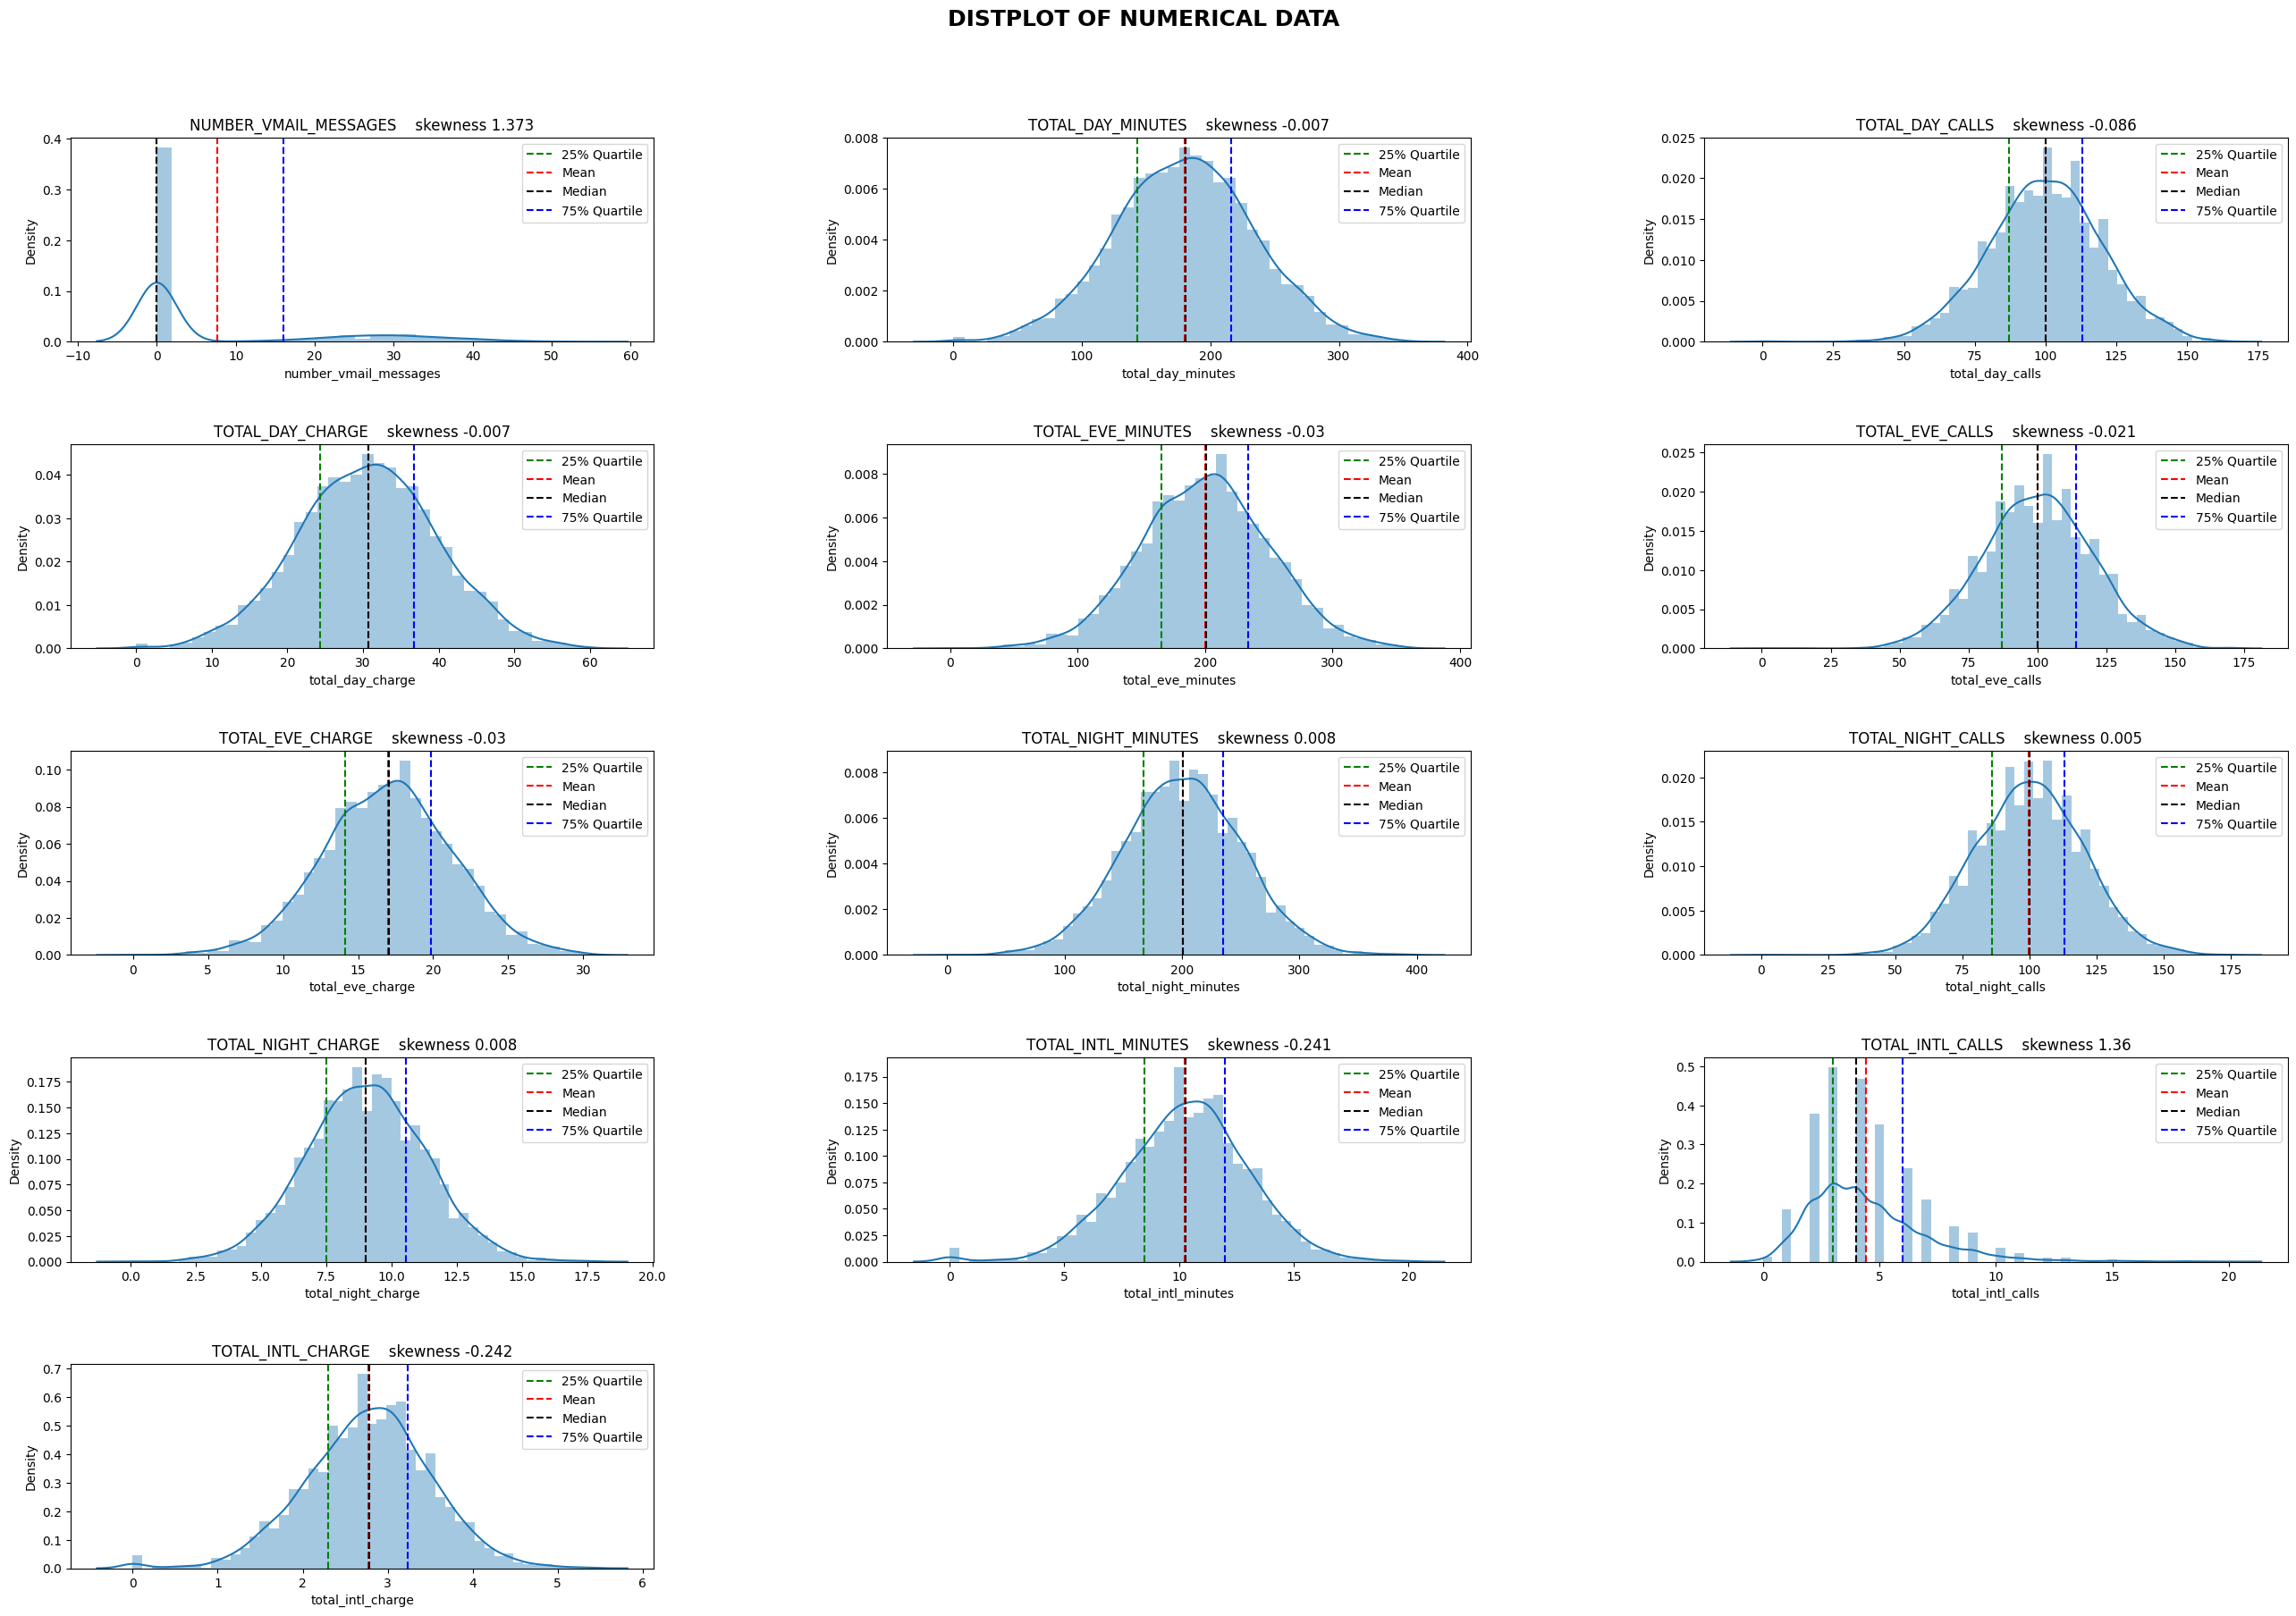

In [12]:
fig = plt.figure(figsize=[32,24])
fig.suptitle('DISTPLOT OF NUMERICAL DATA', fontsize=18, fontweight='bold')
fig.subplots_adjust(top=0.92);
fig.subplots_adjust(hspace=0.5, wspace=0.4);
for i ,col in enumerate(Num_cols):
    ax = fig.add_subplot(6, 3, i+1)
    ax = sns.distplot(df[col])
    ax.axvline(df[col].quantile(q=0.25),color='green',linestyle='--',label='25% Quartile')
    ax.axvline(df[col].mean(),color='red',linestyle='--',label='Mean')
    ax.axvline(df[col].median(),color='black',linestyle='--',label='Median')
    ax.axvline(df[col].quantile(q=0.75),color='blue',linestyle='--',label='75% Quartile')
    ax.set_xlabel(f'{col}')
    ax.set_title(f'{col.upper()}    skewness {round(df[col].skew(),3)}')
    ax.legend(fontsize=10)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


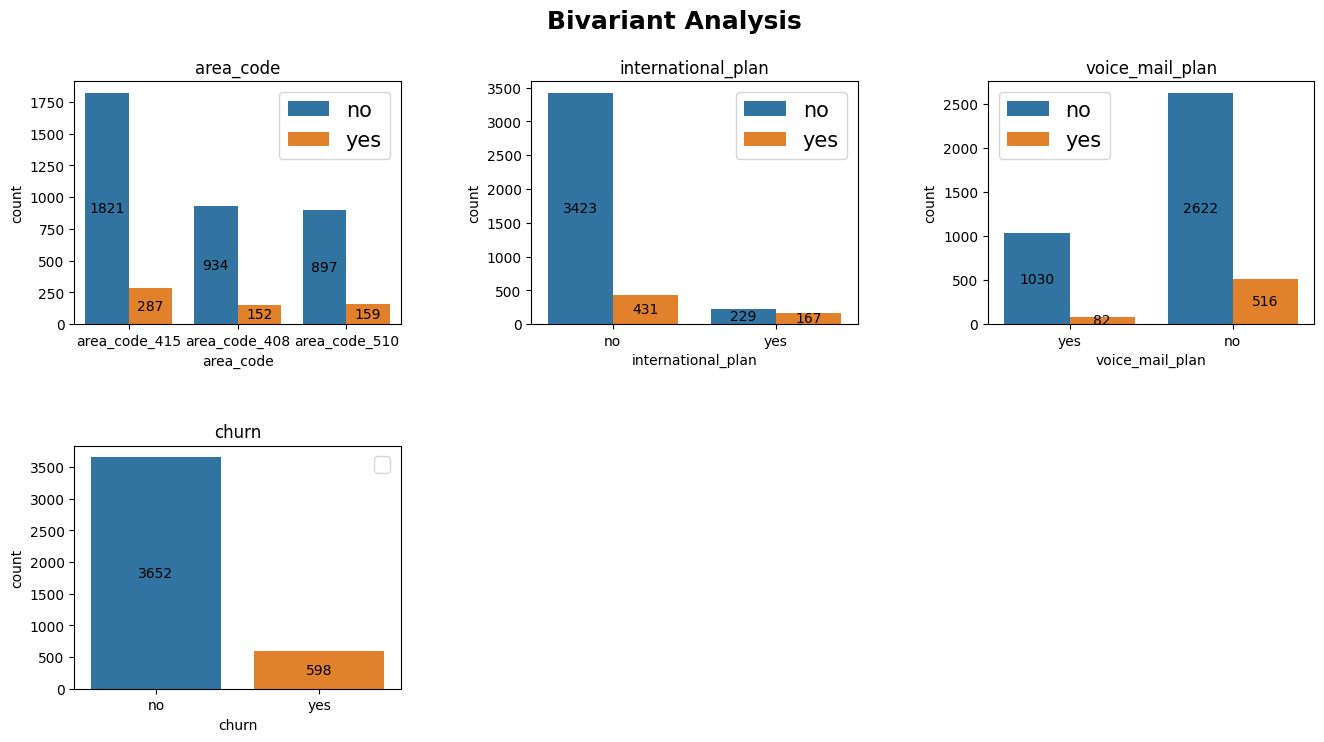

In [13]:
fig = plt.figure(figsize=[16,12])
fig.suptitle('Bivariant Analysis', fontsize=18, fontweight='bold')
fig.subplots_adjust(top=0.92);
fig.subplots_adjust(hspace=0.5, wspace=0.4);
for i ,col in enumerate(categ_columns):
    a = fig.add_subplot(3, 3, i+1)
    a=sns.countplot(x = df[col] , ax=a , hue = df['churn'] )
    a.set_title(col)
    a.bar_label(a.containers[0] , label_type='center')
    a.bar_label(a.containers[1] , label_type='center')
    a.legend(fontsize=15)

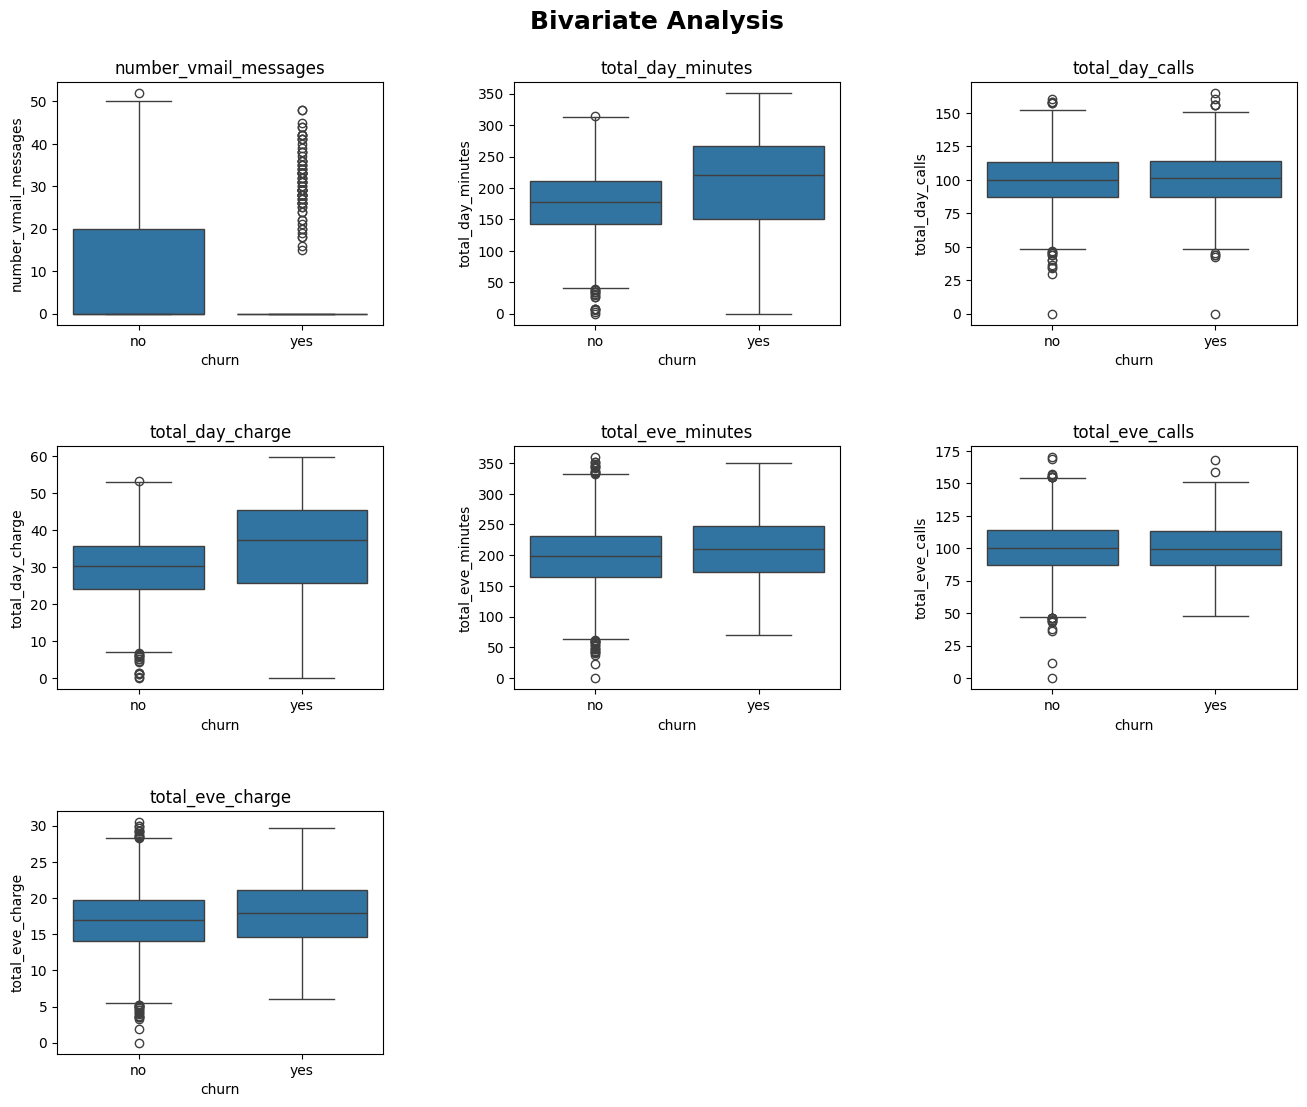

In [14]:
fig = plt.figure(figsize=[16,12])
fig.suptitle('Bivariate Analysis', fontsize=18, fontweight='bold')
fig.subplots_adjust(top=0.92);
fig.subplots_adjust(hspace=0.5, wspace=0.4);
for i ,col in enumerate(Num_cols[0:7]):
    a = fig.add_subplot(3, 3, i+1)
    a=sns.boxplot(x = 'churn' , y =col , ax=a  , data = df )
    a.set_title(col)

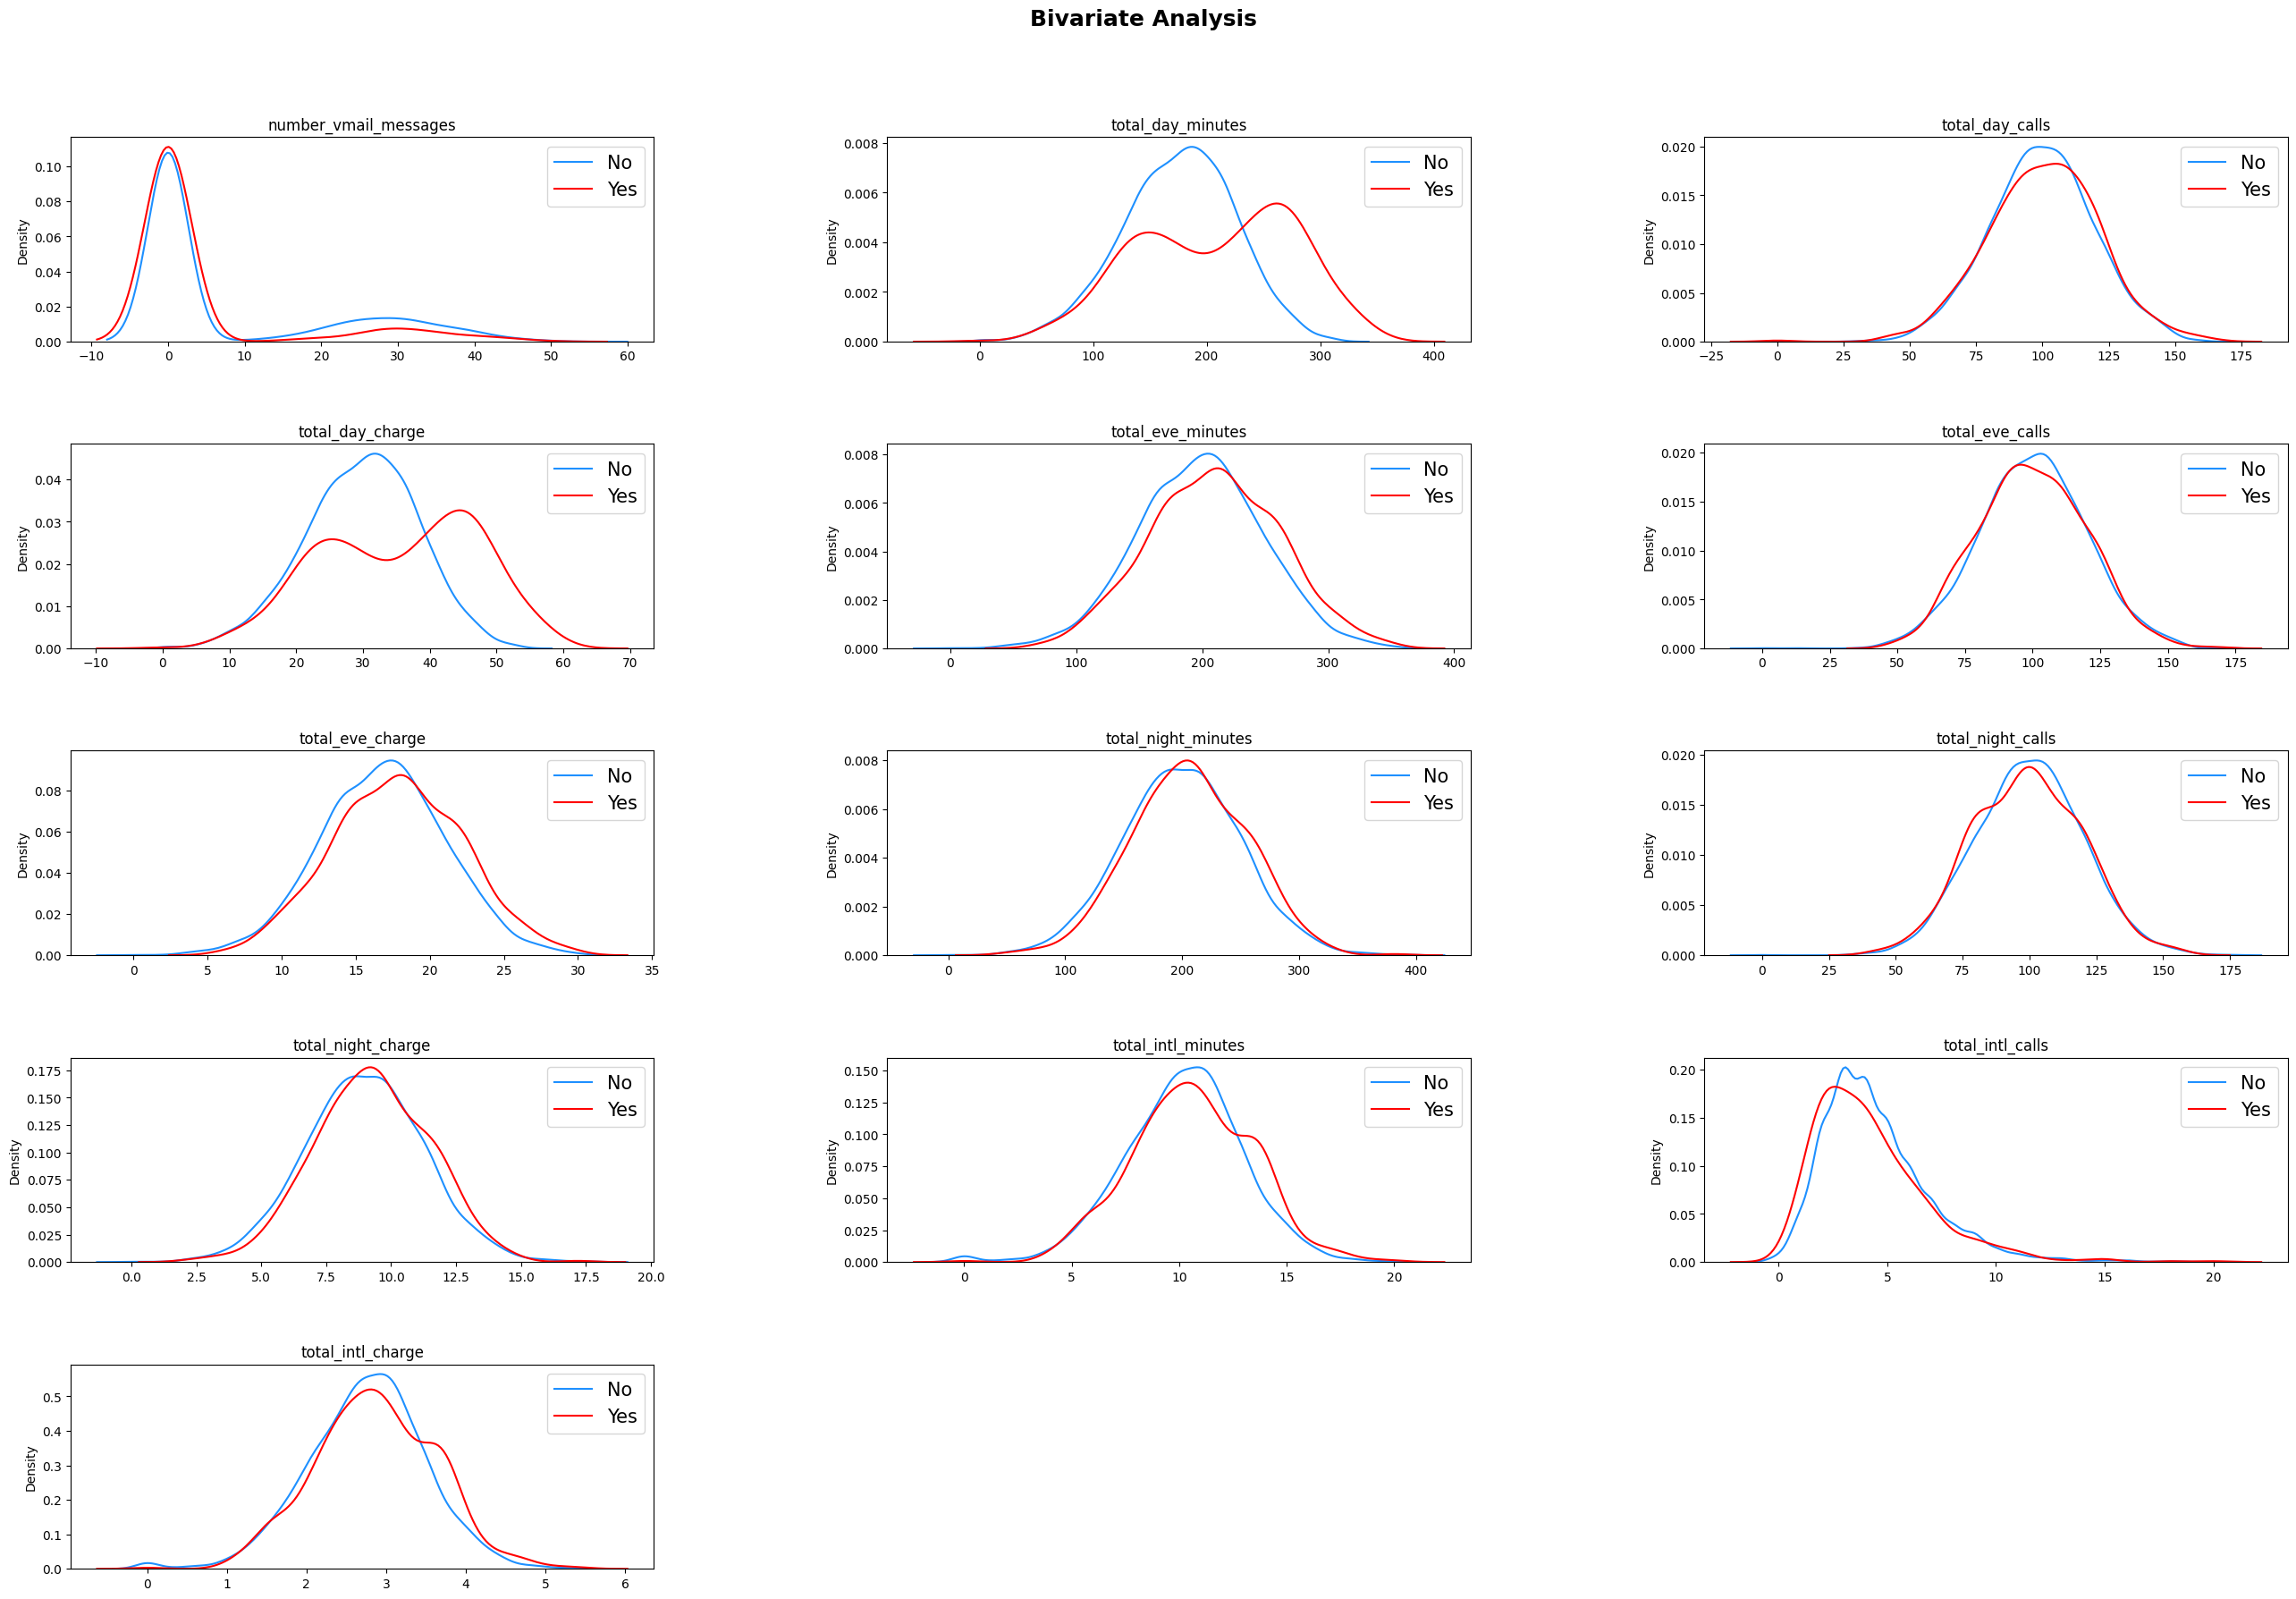

In [15]:
fig = plt.figure(figsize=[32,24])
fig.suptitle('Bivariate Analysis', fontsize=18, fontweight='bold')
fig.subplots_adjust(top=0.92);
fig.subplots_adjust(hspace=0.5, wspace=0.4);
for i ,col in enumerate(Num_cols):
    a = fig.add_subplot(6, 3, i+1)

    sns.distplot(x =df[df['churn']=='no'][col],  color='dodgerblue' , ax=a ,  hist =False)
    sns.distplot(x =df[df['churn']=='yes'][col],  color='red' , ax=a , hist =False)
    a.set_title(col)
    labels = ['No' , 'Yes']
    a.legend( labels  , fontsize = 15)

In [16]:
# Outliers Detection
df_num = df[Num_cols]
df_num.describe()

Q1 = df_num.quantile(0.25)
Q3 = df_num.quantile(0.75)
IQR = Q3 - Q1
IQR
((df_num < (Q1 - 1.5 * IQR)) | (df_num > (Q3 + 1.5 * IQR))).any()

number_vmail_messages    True
total_day_minutes        True
total_day_calls          True
total_day_charge         True
total_eve_minutes        True
total_eve_calls          True
total_eve_charge         True
total_night_minutes      True
total_night_calls        True
total_night_charge       True
total_intl_minutes       True
total_intl_calls         True
total_intl_charge        True
dtype: bool

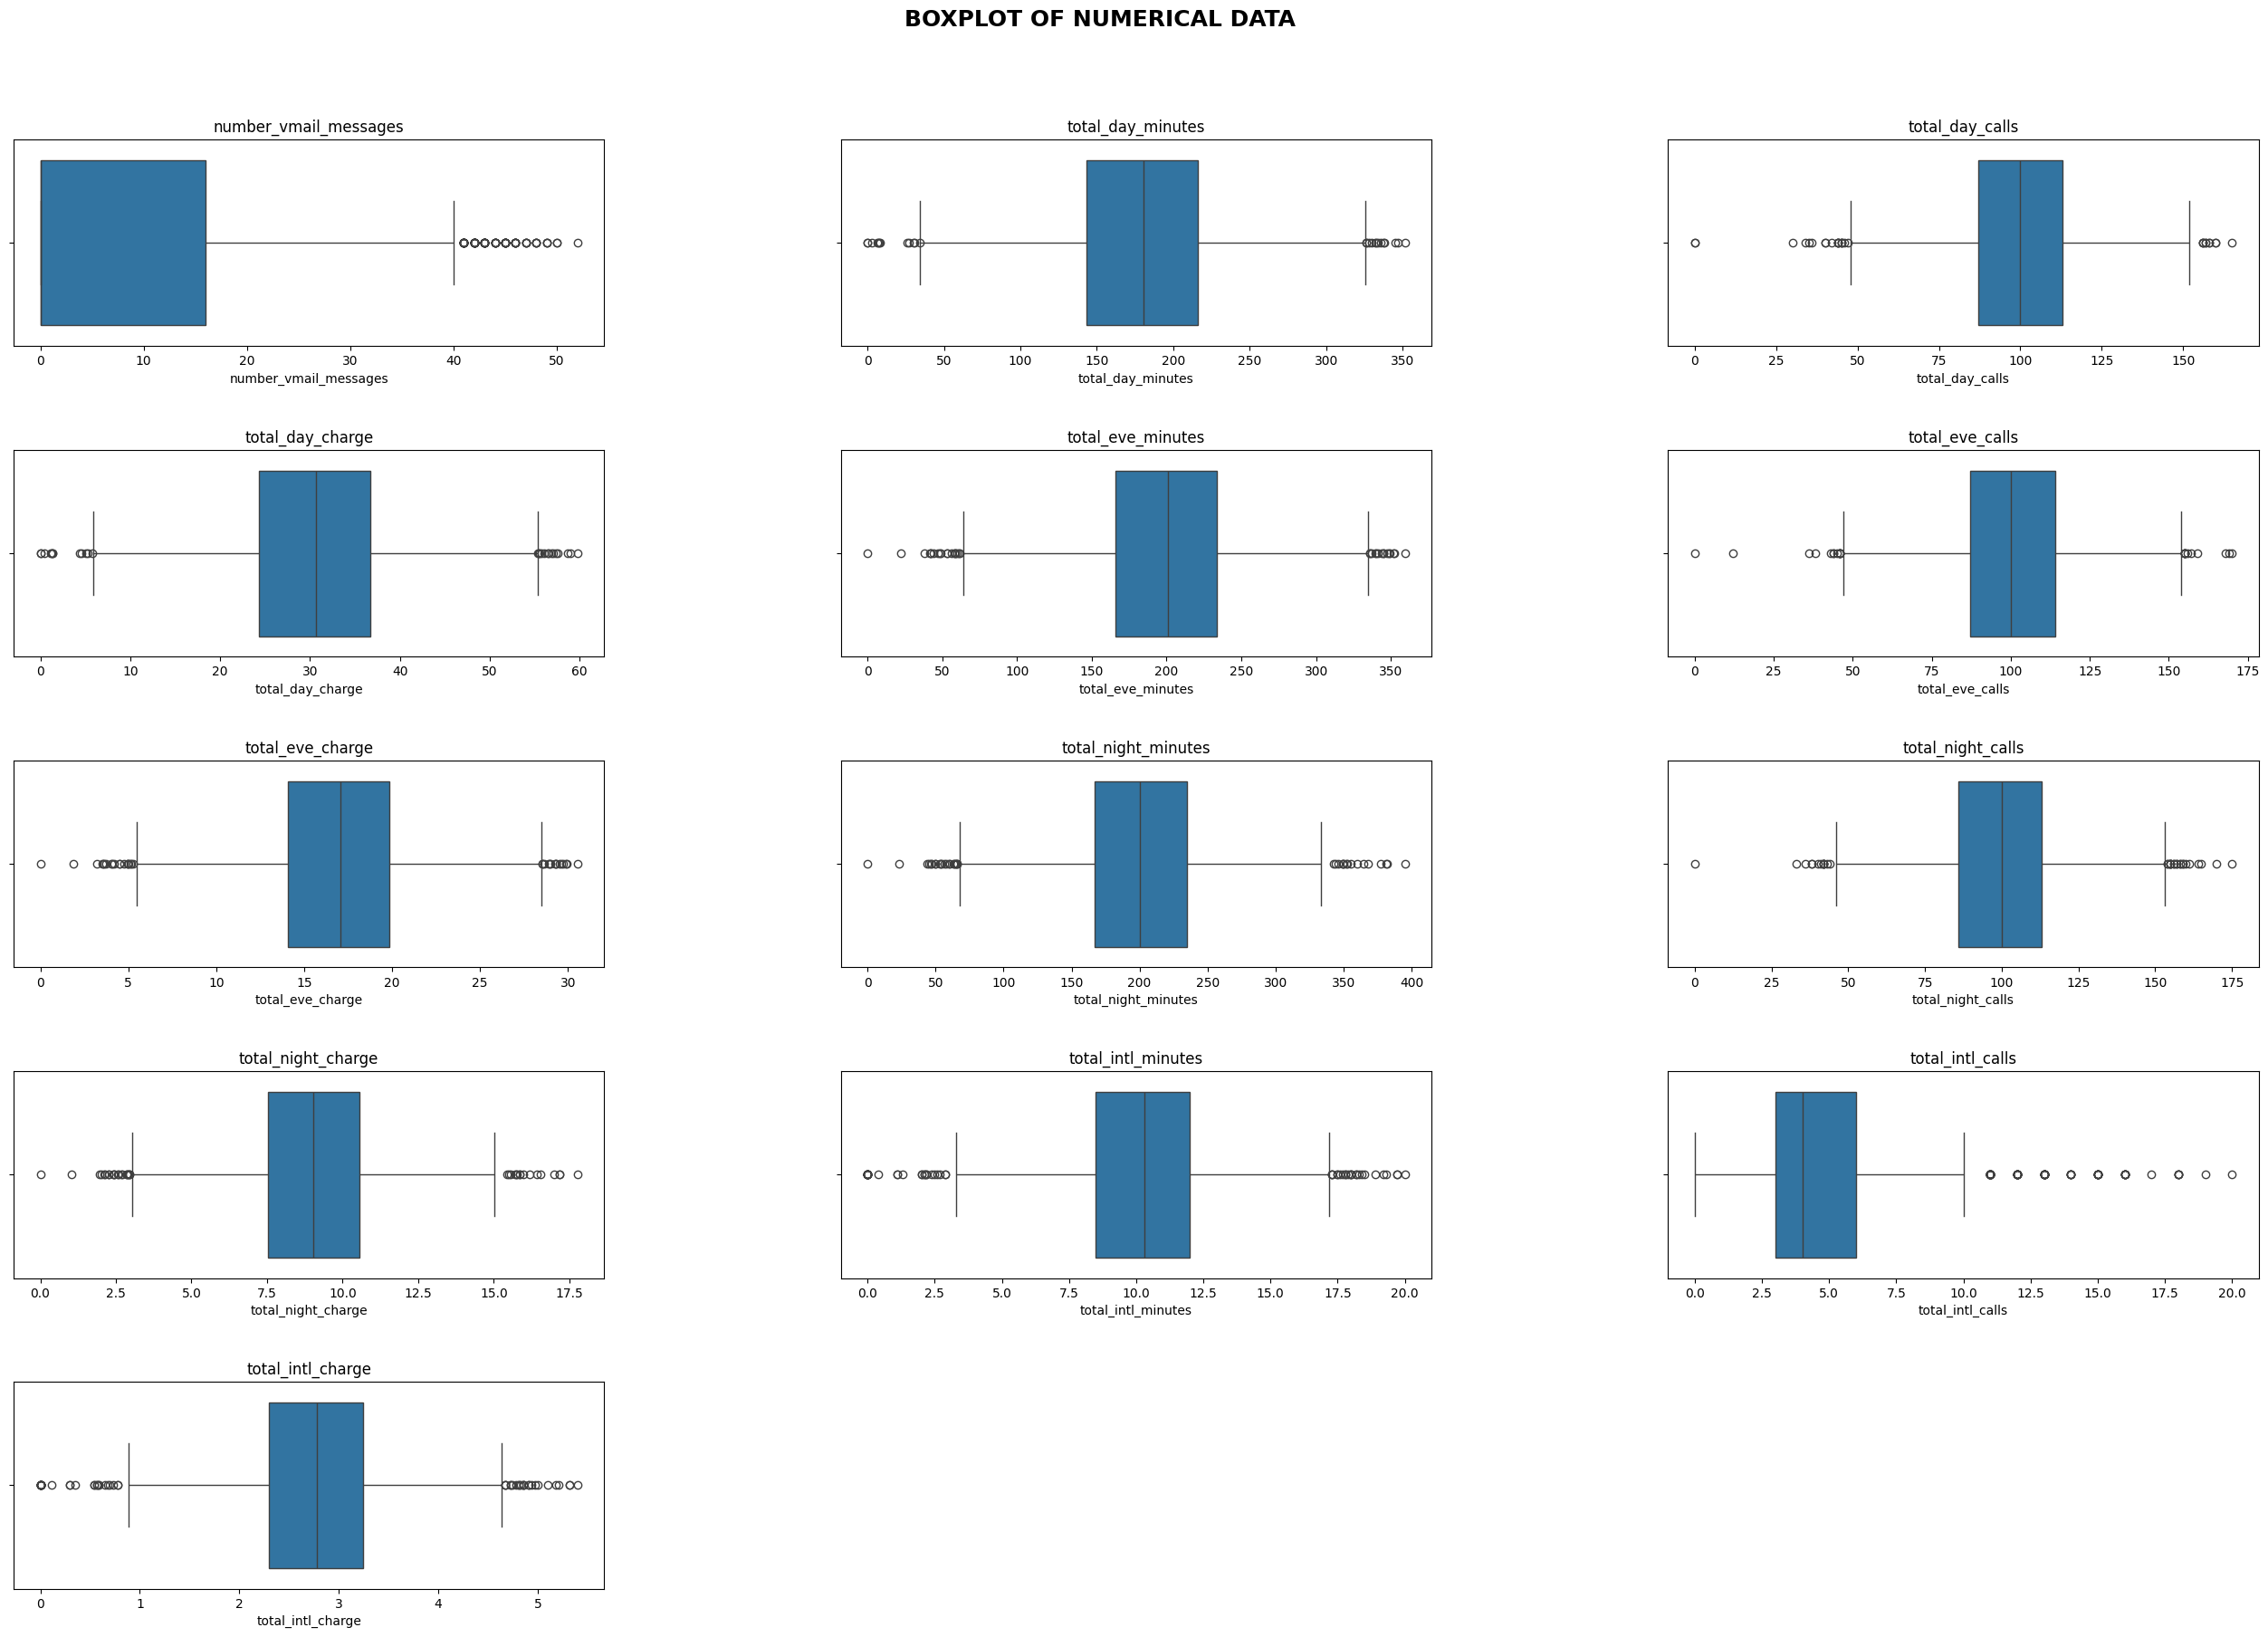

In [17]:
fig = plt.figure(figsize=[32,24])
fig.suptitle('BOXPLOT OF NUMERICAL DATA', fontsize=18, fontweight='bold')
fig.subplots_adjust(top=0.92);
fig.subplots_adjust(hspace=0.5, wspace=0.4);
for i ,col in enumerate(Num_cols):
    ax1 = fig.add_subplot(6,3, i+1);
    ax1 = sns.boxplot(data = df, x=col);

    ax1.set_title(f'{col}')
    ax1.set_xlabel(f'{col}')

In [18]:
dict = {}
for col in Num_cols:
    percentile25 = df[col].quantile(0.25)
    percentile75 = df[col].quantile(0.75)
    IQR  = percentile75 - percentile25
    upper_limit = percentile75 + 1.5 * IQR
    lower_limit = percentile25 - 1.5 * IQR
    dict['upper_limit'+ '_' + col] = upper_limit
    dict['lower_limit'+ '_' + col] = lower_limit

In [19]:
for col in Num_cols:
    df[col] = np.where(
        df[col] > dict['upper_limit_' + col],
        dict['upper_limit_' + col],
        np.where(
            df[col] < dict['lower_limit_' + col],
            dict['lower_limit_' + col],
            df[col]
        )
    )

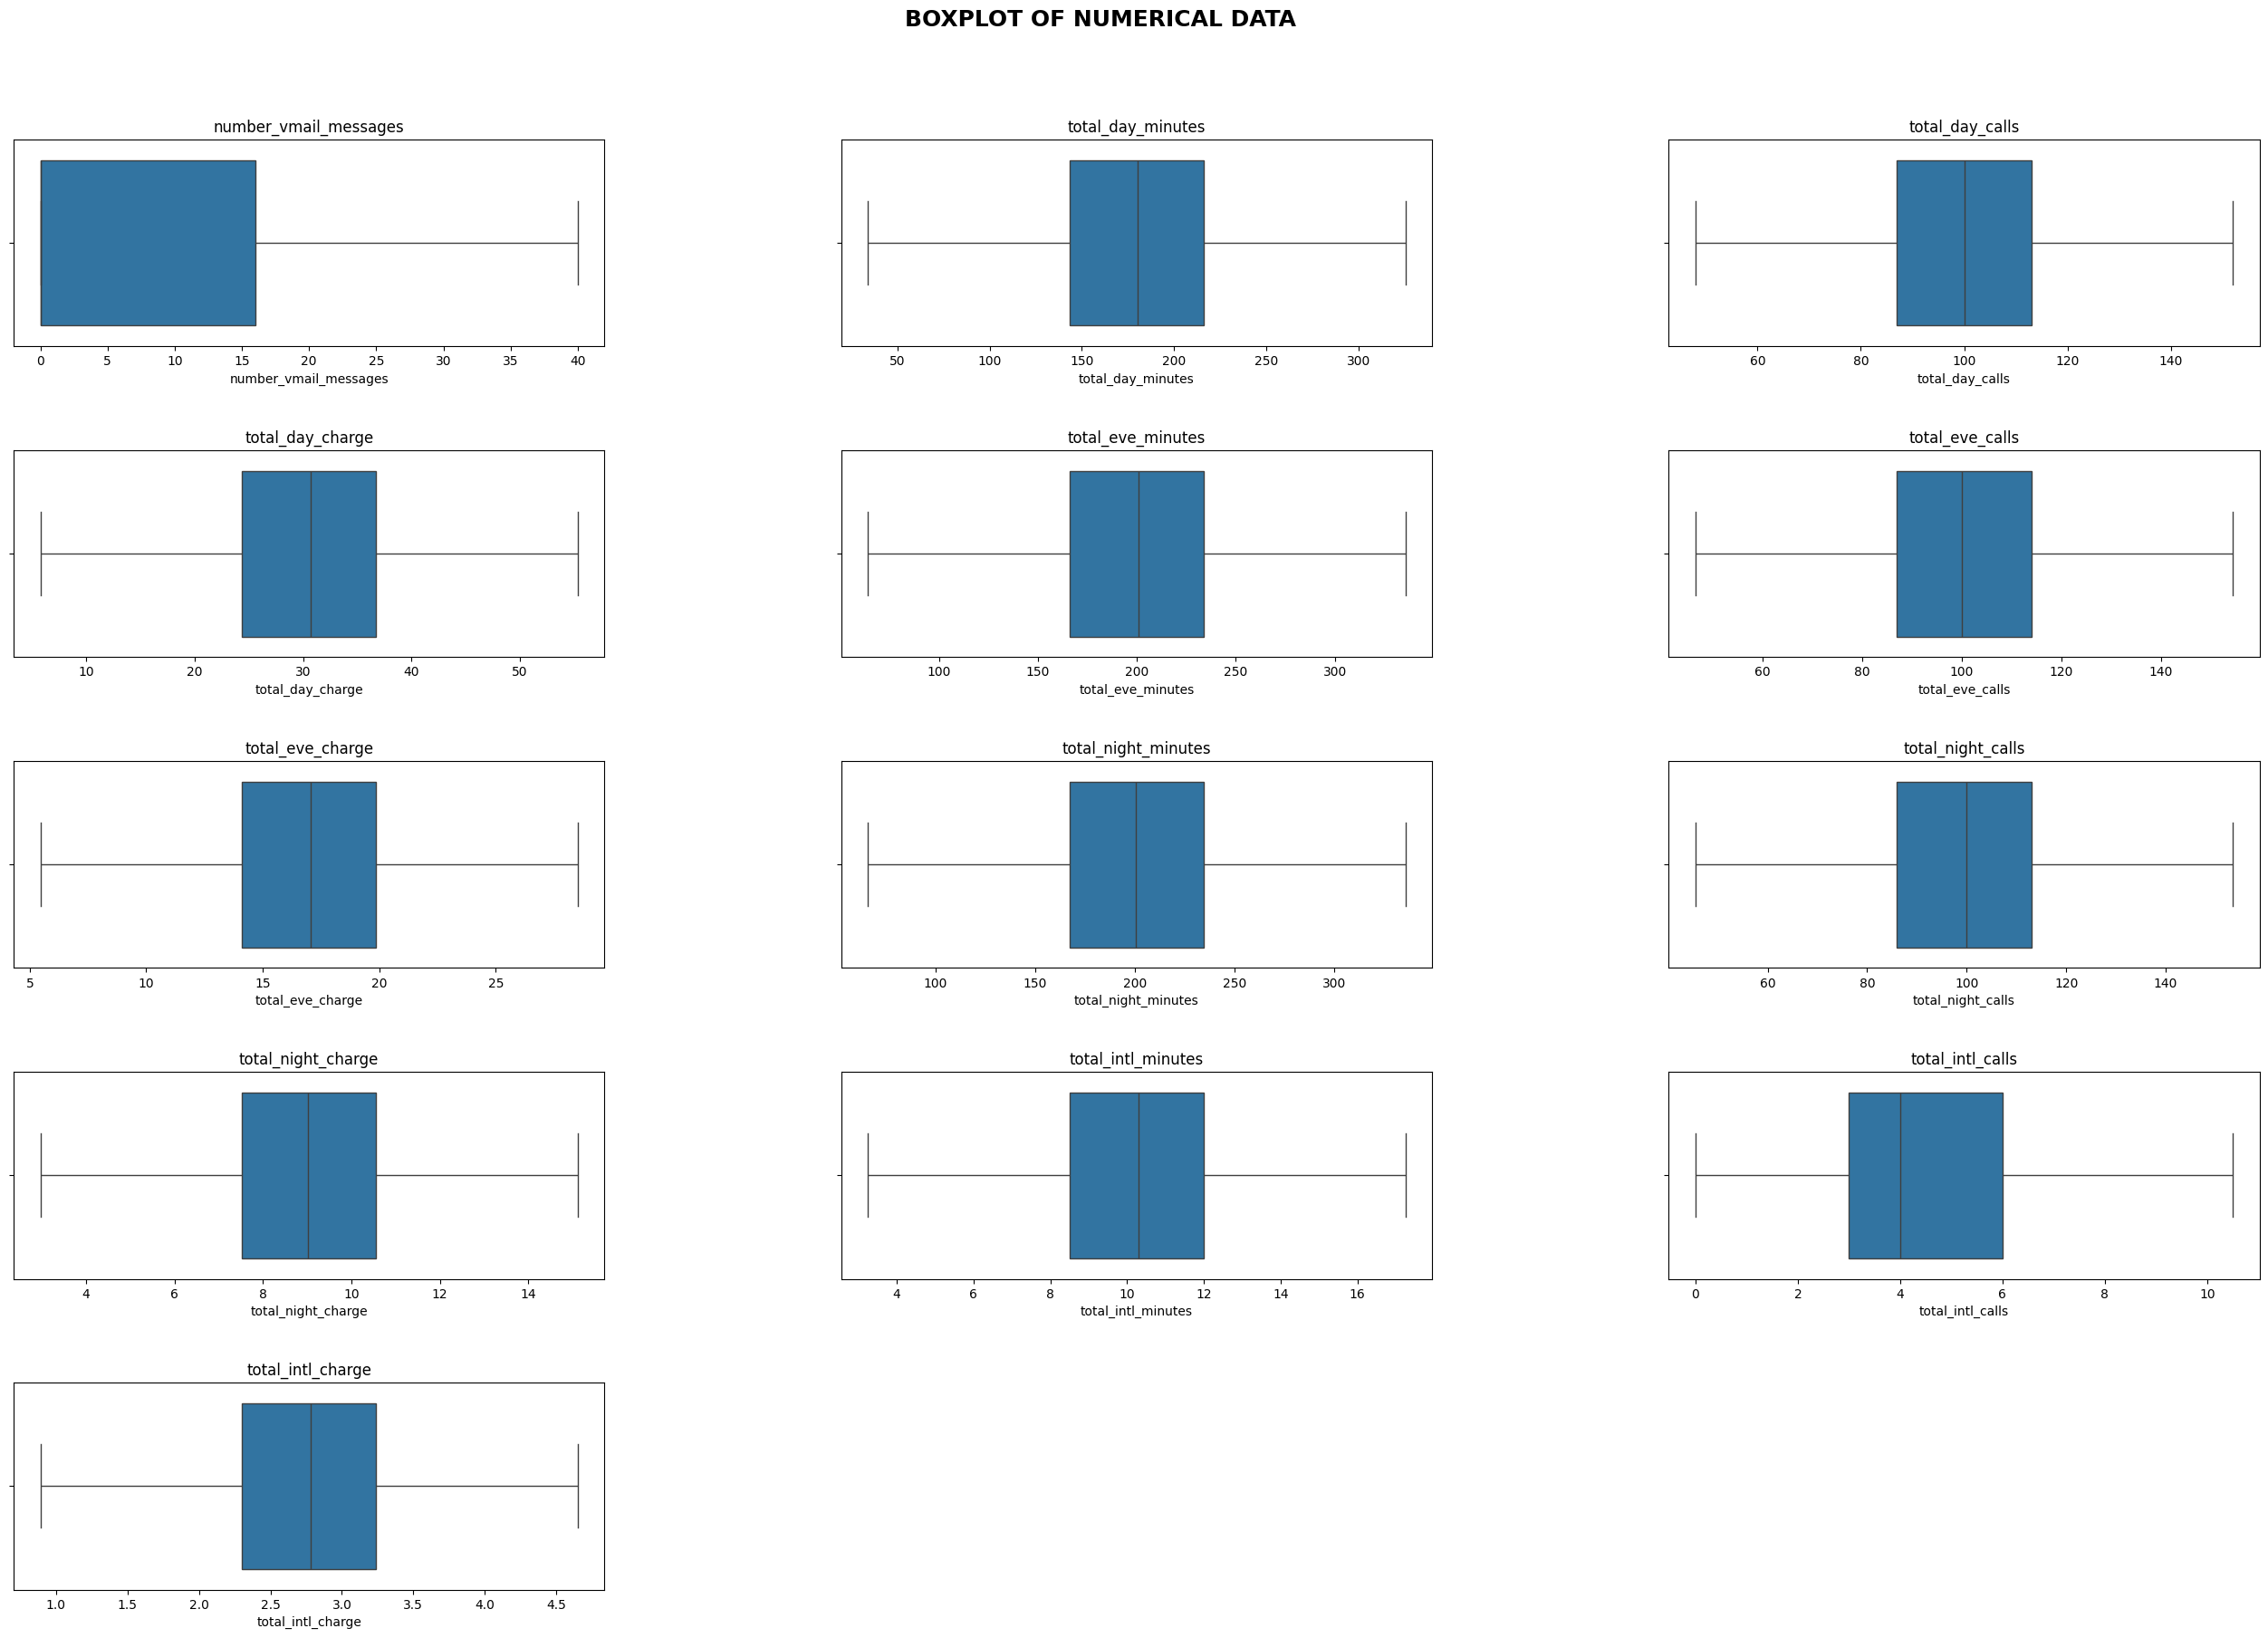

In [20]:
fig = plt.figure(figsize=[32,24])
fig.suptitle('BOXPLOT OF NUMERICAL DATA', fontsize=18, fontweight='bold')
fig.subplots_adjust(top=0.92);
fig.subplots_adjust(hspace=0.5, wspace=0.4);
for i ,col in enumerate(Num_cols):
    ax1 = fig.add_subplot(6,3, i+1);
    ax1 = sns.boxplot(data = df, x=col );

    ax1.set_title(f'{col}')
    ax1.set_xlabel(f'{col}')

## Feature Engineering

In [21]:
def preprocess(df):
    df['total_nat_minutes'] = df['total_day_minutes'] + df['total_eve_minutes'] + df['total_night_minutes']
    df['total_nat_calls'] = df['total_day_calls'] + df['total_eve_calls'] + df['total_night_calls']
    df['total_nat_charge'] = df['total_day_charge'] + df['total_eve_charge'] + df['total_night_charge']
    df['area_code'] = df['area_code'].apply(lambda x: int(x.split("_")[2]))
    df['international_plan'] = df['international_plan'].map({'yes': 1, 'no': 0})
    df['voice_mail_plan'] = df['voice_mail_plan'].map({'yes': 1, 'no': 0})

    encoder = OrdinalEncoder()
    df["state"] = encoder.fit_transform(df[["state"]])

    return df

In [22]:
df_new = preprocess(df)
df_new.head()

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,...,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn,total_nat_minutes,total_nat_calls,total_nat_charge
0,35.0,107,415,0,1,26.0,161.6,123.0,27.47,195.50,...,103.0,11.45,13.7,3.0,3.70,1,no,611.50,329.0,55.540
1,31.0,137,415,0,0,0.0,243.4,114.0,41.38,121.20,...,104.0,7.32,12.2,5.0,3.29,0,no,527.20,328.0,59.000
2,35.0,84,408,1,0,0.0,299.4,71.0,50.90,64.15,...,89.0,8.86,6.6,7.0,1.78,2,no,560.45,248.0,65.215
3,36.0,75,415,1,0,0.0,166.7,113.0,28.34,148.30,...,121.0,8.41,10.1,3.0,2.73,3,no,501.90,356.0,49.360
4,19.0,121,510,0,1,24.0,218.2,88.0,37.09,335.55,...,118.0,9.57,7.5,7.0,2.03,3,no,766.35,314.0,75.175


## Corelation Data

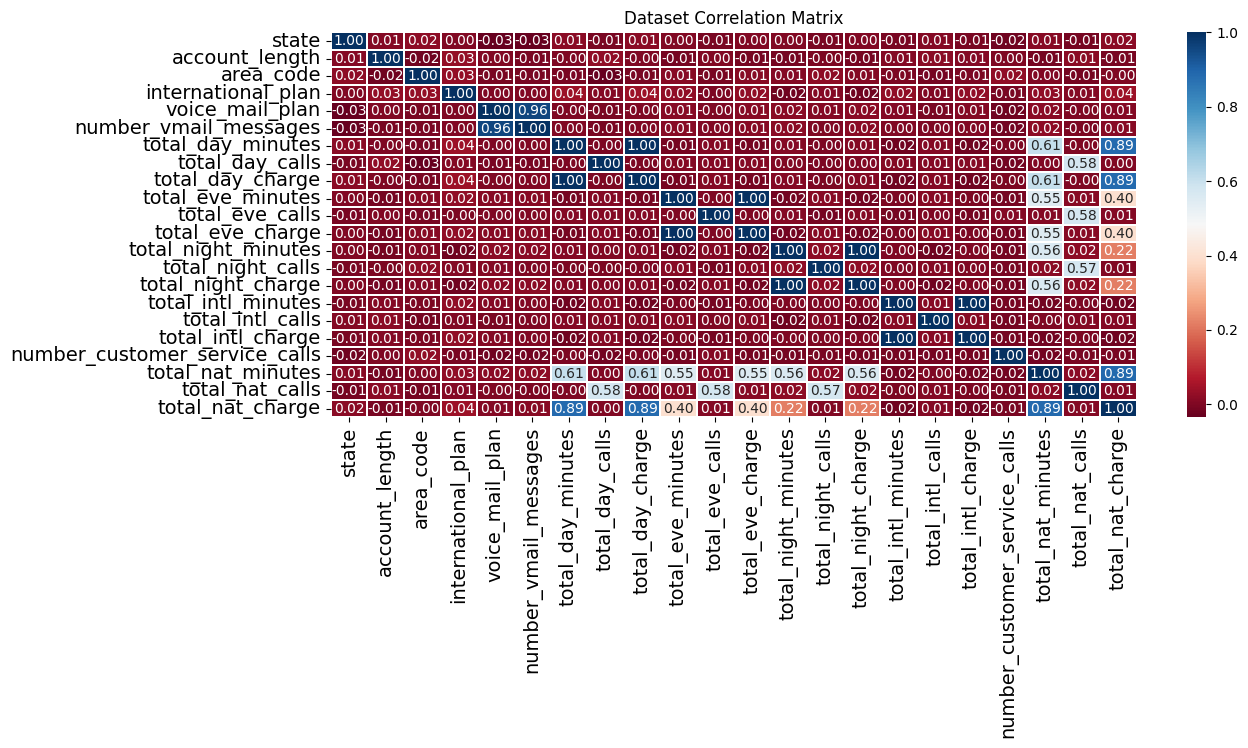

In [25]:
# Corelation
fig, ax = plt.subplots(figsize=[13,5])
df_new2 = df_new.loc[:, ~df_new.columns.isin(['churn'])]
sns.heatmap(df_new2.corr(), ax=ax,  annot=True, linewidths=0.05, fmt= '.2f',cmap='RdBu')
ax.tick_params(axis='both', which='major', labelsize=14)
ax.set_title('Dataset Correlation Matrix')
fig.show()

## Modeling and Evaluation

In [26]:
X, y = df_new.loc[:, ~df_new.columns.isin(['churn'])], df_new.churn.map({'yes': 1, 'no': 0})
X_train , X_val , y_train , y_val = train_test_split(X , y  ,test_size = 0.20 , random_state = 42)

In [27]:
model_list = []
accuracy_list = []
recall_list = []
precision_list = []
f1_score_list= []
cross_val_score_list = []

In [28]:
def Model_features(X_test , y_test , y_pred , classifier, model_name):
#     fig ,ax = plt.subplots(figsize = (7,6))
    accuracy , precision , recall , f1_s ,c_val_score= round(accuracy_score(y_test , y_pred) , 3) , round(precision_score(y_test, y_pred, average="micro")  ,3), round(recall_score(y_test , y_pred) ,3), round(f1_score(y_test , y_pred) , 3) , round(cross_val_score(classifier , X_test , y_test , cv=5 , scoring='accuracy').mean()  , 3)
    print(f'Accuracy Score is :{accuracy}')
    print(f'Precision Score is :{precision}')
    print(f'Recall Score is :{recall}')
    print(f'f1  Score is :{f1_s}')
    print(f'cross val score is :{c_val_score}')
    model_list.append(model_name)
    accuracy_list.append(accuracy)
    recall_list.append(recall)
    precision_list.append(precision)
    f1_score_list.append(f1_s)
    cross_val_score_list.append(c_val_score)

#     print(f'f1  Score is :{round(specificity_score(y_test , y_pred) , 3)}')
    print(classification_report(y_test, y_pred))

In [29]:
def confusion_matrix_plot(y_test, ypred):
    cm = confusion_matrix(y_test, ypred)
    ax = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["No Churn", "Churn"])
    ax.plot()
    plt.show()

In [30]:
model_rf = RandomForestClassifier()
model_rf.fit(X_train, y_train)
y_pred = model_rf.predict(X_val)
model_rf.score(X_val , y_val)

0.971764705882353

Accuracy Score is :0.972
Precision Score is :0.972
Recall Score is :0.845
f1  Score is :0.901
cross val score is :0.945
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       721
           1       0.96      0.84      0.90       129

    accuracy                           0.97       850
   macro avg       0.97      0.92      0.94       850
weighted avg       0.97      0.97      0.97       850



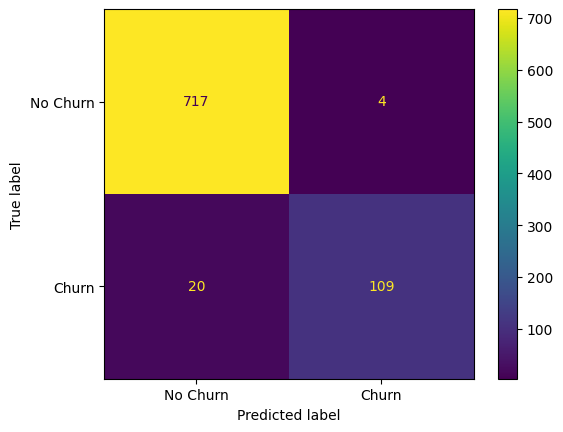

In [31]:
Model_features(X_val , y_val  , y_pred , model_rf , "random forest")
confusion_matrix_plot(y_val, y_pred)

In [32]:
test = pd.read_csv('test.csv')
X_test = preprocess(test)


In [33]:
test['churn'] = model_rf.predict(X_test.loc[:, ~X_test.columns.isin(['id'])])
test['churn'] = test['churn'].apply(lambda x: 'yes' if x == 1 else 'no')

In [42]:
X_test.head(1)

,id,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,total_nat_minutes,total_nat_calls,total_nat_charge,churn
0,1,16.0,128,415,0,1,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.7,1,707.2,300,72.86,no


In [40]:
pd.set_option('display.max_rows', None)  # Menampilkan semua baris
pd.set_option('display.max_columns', None)  # Menampilkan semua kolom
test.head(1)

,id,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,total_nat_minutes,total_nat_calls,total_nat_charge,churn
0,1,16.0,128,415,0,1,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.7,1,707.2,300,72.86,no


In [36]:
test.columns

Index(['id', 'state', 'account_length', 'area_code', 'international_plan',
       'voice_mail_plan', 'number_vmail_messages', 'total_day_minutes',
       'total_day_calls', 'total_day_charge', 'total_eve_minutes',
       'total_eve_calls', 'total_eve_charge', 'total_night_minutes',
       'total_night_calls', 'total_night_charge', 'total_intl_minutes',
       'total_intl_calls', 'total_intl_charge',
       'number_customer_service_calls', 'total_nat_minutes', 'total_nat_calls',
       'total_nat_charge', 'churn'],
      dtype='object')

In [37]:
test.to_csv('new_test.csv', index=False)

In [38]:
from joblib import dump
dump(model_rf, 'rf.sav')

['rf.sav']

## XAI

Text(0.5, 0, 'Permutation Importance')

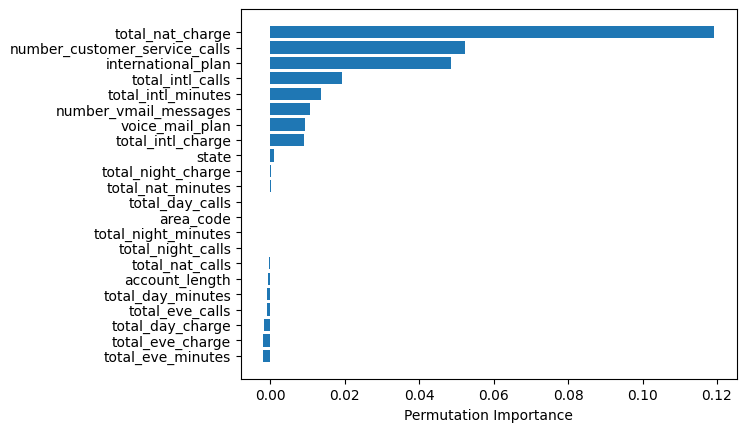

In [39]:
from sklearn.inspection import permutation_importance

perm_importance = permutation_importance(model_rf, X_val, y_val)

sorted_idx = perm_importance.importances_mean.argsort()
plt.barh(X.columns[sorted_idx], perm_importance.importances_mean[sorted_idx])
plt.xlabel("Permutation Importance")